# Aprendizaje supervisado

## Regresión Lineal Simple


### Modelo

Dado un conjunto de $m$ datos estadísticos $S$ conformado por la relación de dos variables dependientes $X$ e $Y$, tal que $ S = \{(x^{(1)},y^{(1)}), ... ,(x^{(m)},y^{(m)}) \} $. El modelo asume que estas variables se poseen  una relación lineal, se define la función de hipótesis $h_\theta(x^{(i)})$ como una aproximación al valor real de $y^{(i)}$.

$$h_\theta(x) = \theta_0 + x \theta_1$$ Con $\theta_0, \theta_1 \in \!R$

Con una buena función hipótesis se podrá predecir cuál será el valor $y$ para un $x$ determinado.

### Objetivo

Se desea determinar los valores de los parámetros $\theta_0$ y $\theta_1$ que mejor representen la relación entre las variables $x$ e $y$. Se define la función de costo $J(\theta_0, \theta_1)$ como una medida del **Error** de nuestra función hipótesis. Una buena aproximación es aquella con el **menor error**, es por esto que nuestro objetivo es: **Determinar los valores de $\theta_0$ y $\theta_1$ donde la función $J(\theta_0, \theta_1)$ sea un mínimo**

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + x^{(i)} \theta_1 - y^{(i)})^2$$

### Gradient Descent

_Gradient Descent_ es un algoritmo que nos permite hallar un mínimo local de una función sin usar un método numérico. Este consiste en ir tomando pequeños pasos proporcionales al negativo del **gradiente**. Definimos Gradient Descent para nuestra regresión lineal univariada:

\begin{align}
    \theta_0 &= \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \\
    \theta_1 &= \theta_1 - \alpha \frac{\partial }{\partial \theta_1} J(\theta_0, \theta_1) = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) * x^{(i)}
\end{align}

Es necesario notar que la función de costo depende de $\theta_0$ y $\theta_1$, se define **$\alpha$** como el factor de aprendizaje (_learning rate_). Además se debe realizar el calculo de manera simultanea, esto quiere decir que el nuevo valor de $\theta_0$ no debe influir en el calculo de nuevo valor de $\theta_1$.

### Ejemplo

Se utilizará el _dataset_ boston house-prices del módulo sklearn. 

In [28]:
# Import modules
from sklearn.datasets import load_boston, load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ipywidgets import IntSlider, interact, fixed

sns.set()

%matplotlib inline

#### Cargar datos

El primer paso es cargar los datos y realizar un primer plot para conocer nuestro dataset. 

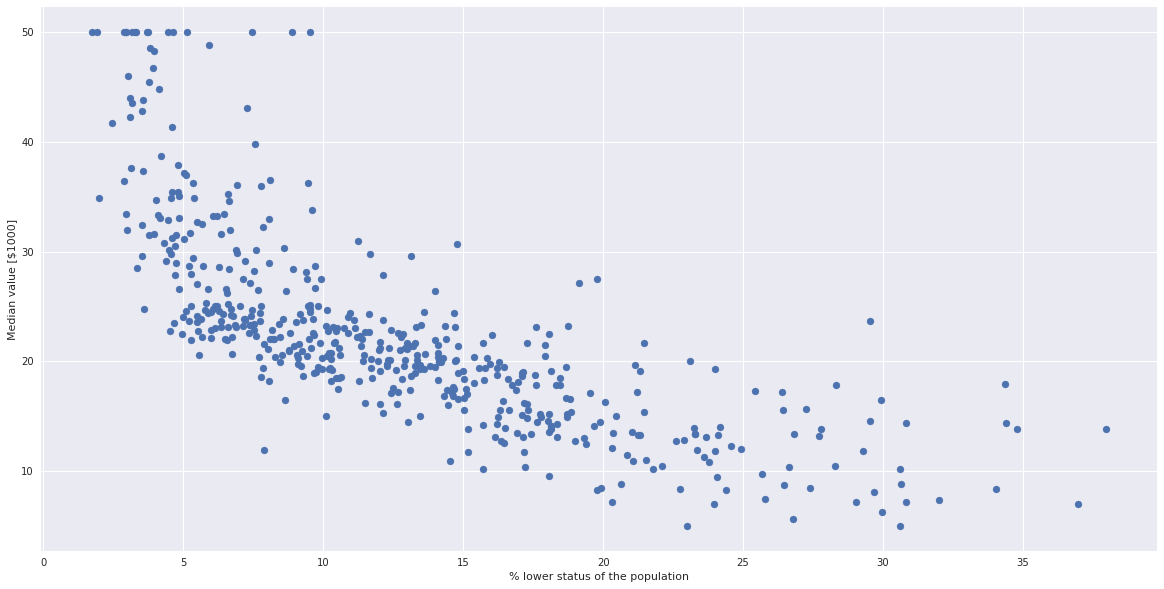

In [29]:
data, target = load_boston(True)

x = data[:,12]
y = target

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.ylabel("Median value [$1000]")
plt.xlabel("% lower status of the population")
plt.show()

In [30]:
# Funcion Hipotesis H
def hip(X, theta0, theta1):
    # X     : vector
    # theta0: scalar
    # theta1: scalar
    return theta0 + theta1*X

# Funcion de Costo J
def J(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = x.size
    return  (1/(2*m))* np.sum((hip(X, theta0, theta1)-Y)**2)

# Derivada parcial en theta0 de J
def dJdt0(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = X.size
    return (1/m)* np.sum((hip(X, theta0, theta1)-Y))

# Derivada parcial en theta1 de J
def dJdt1(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = x.size
    return (1/m)* np.sum((hip(X, theta0, theta1)-Y)*X)

def GradientDescent(X, Y, alpha, epsilon=0.01):
    # X     : vector
    # Y     : vector
    
    #inicializamos valores para theta0 y theta1
    theta0 = np.random.rand()*10
    theta1 = np.random.rand()*10
    
    hist = [(theta0, theta1)]
    
    converge = False
    while not converge:
        # Calculamos los nuevos thetas
        ntheta0 = theta0 - alpha*dJdt0(theta0, theta1, X, Y)
        ntheta1 = theta1 - alpha*dJdt1(theta0, theta1, X, Y)

        # Converge si el cambio de los parametros es menor a epsilon
        converge = np.linalg.norm((theta0 - ntheta0, theta1 - ntheta1)) < epsilon

        # Guardamos como van cambiando los thetas
        hist.append((ntheta0, ntheta1))

        # actualizamos los parametros
        theta0, theta1 = ntheta0, ntheta1
    
    return theta0, theta1, hist


In [32]:
theta, hist = GradientDescent(x, y, 1e-4,  1e-4)
print("theta0: %f\ntheta1: %f" % (theta[0], theta[1]))

ValueError: too many values to unpack (expected 2)

### Mostrar resultados

Determinar que nuestro algoritmo funciona correctamentes significa que, en cada iteración $J(\theta_0 \theta_1)$ reduce su valor

In [33]:
thetas = np.array(hist)
jmin = np.apply_along_axis(lambda t: J(t[0], t[1], x, y), 1, thetas)

plt.plot(jmin)
plt.ylabel("J")
plt.xlabel("iterations")
plt.show()

ValueError: shapes (506,) and (2,) not aligned: 506 (dim 0) != 2 (dim 0)

In [7]:
def plotter(thetas, iteration, X, Y):
    model = hip(np.arange(X.max()*1.25), thetas[iteration][0], thetas[iteration][1])
    plt.figure(figsize=(20,10))
    plt.plot(model, 'r')
    plt.scatter(x, y)
    plt.ylabel("Median value [$1000]")
    plt.ylim(-1,55)
    plt.xlim(0,40)
    plt.xlabel("% lower status of the population")
    plt.show()

    
interact(plotter, thetas=fixed(hist), iteration=IntSlider(min=0,max=len(hist)-1,step=1,value=0), X=fixed(x), Y=fixed(y) );  


## Regresión Lineal Multivariable

### Modelo

Supongamos nuestro modelo ya no depende de una sola característica $x$, si no que depende de un vector de 
caracteristicas $X$ de tamaño $n$. \vec{x^{(i)}} &= \{x^{(i)}_1, ..., x^{(i)}_n \}.  De esta forma nuestra función hipótesis queda definida como: 

$$h_\theta(x^{(i)}) = \theta_0 + x^{(i)}_1 \theta_1 + ... + x^{(i)}_n \theta_n$$

Podemos aprovechar nuestros conocimientos de algebra lineal, pare esto definiremos nuestra función hipótesis como el producto de matrices. Primero debemos agregar una dimensión a nuestro vector $X$. Así $X = \{ x_0, x_1, ..., x_n \}$; con $x_0 = 1$.

Dado esto, podemos volver a definir un modelo general para regresión lineal para $n$ características.

Teniendo un conjunto  $S$ de $m$ datos estadísticos, donde cada instancia posee $n$ características. Sobre esto definimos lo siguiente:

\begin{align}
    \vec{x^{(i)}} &= \{x^{(i)}_0, x^{(i)}_1, ..., x^{(i)}_n \} &: \text{vector instancia de } n+1 \text{ dimensiones, con } x_0 \text{ definido igual a 1} \\
    X &= \left( \begin{array}{c} \vec{x^{(1)}} \\ ...  \\ \vec{x^{(m)}} \end{array} \right) &: \text{matriz de las instancias de } x \\
    Y &= \left( \begin{array}{c} y^{(1)} \\ ...  \\ y^{(m)} \end{array} \right) &: \text{ matriz de valores esperados para cada instancia. }\\
    \vec{\theta} &= \{ \theta_0,  ...  ,  \theta_n \} &: \text{ vector parámetros  de } n+1 \text{ dimesiones}\\
\end{align}

Definimos la función hipótesis como: 

$$ h_\theta(\vec{x}) =  \theta_0 x_0  +  ...  +  \theta_n x_n = \vec{\theta^T} \vec{x}$$




### Objetivo

Se define la función de costo $J(\vec{\theta})$ como una medida del **Error** de nuestra función hipótesis.
Se desea determinar los valores del vector de parámetros $\vec{\theta}$ para que $J(\vec{\theta})$ sea un mínimo.

$$J(\vec{\theta}) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(\vec{x^{(i)}}) - y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^{m}( \vec{\theta^T}  \vec{x^{(i)}} - y^{(i)})^2$$


### Gradient descent

Generalizamos la función para cualquier $\theta_j$:

$$\theta_j = \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\vec{\theta}) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(\vec{x^{(i)}}) - y^{(i)}) * x^{(i)}_{j}$$


Introducimos dos métodos para realizar un _Gradient descent_ más rápida

#### Feature scaling

El primer método es el _escalado de características_. Consiste en mantener los valores de las características en una escala comparable. Dividimos la característica de las instancias por el rango de la característica.

$$ x^{(i)}_j := \frac{x^{(i)}_j}{range(x_j)} $$

De manera alternativa, puede dividirse por la **desviación standard**.

#### Mean normalization

El segundo método consiste en restar a cada característica el valor de su media, y así lograr una nueva media igual a 0.

$$ x^{(i)}_j :=  x^{(i)}_j - mean(x_j) $$


Usar ambos métodos obtendrémos valores que se mueven entre -1 y 1, con una media de 0. Esto puede lograr una convergencia más rápida del _gradient descent_. 

$$ x^{(i)}_j := \frac{x^{(i)}_j - mean(x_j) }{range(x_j)}$$


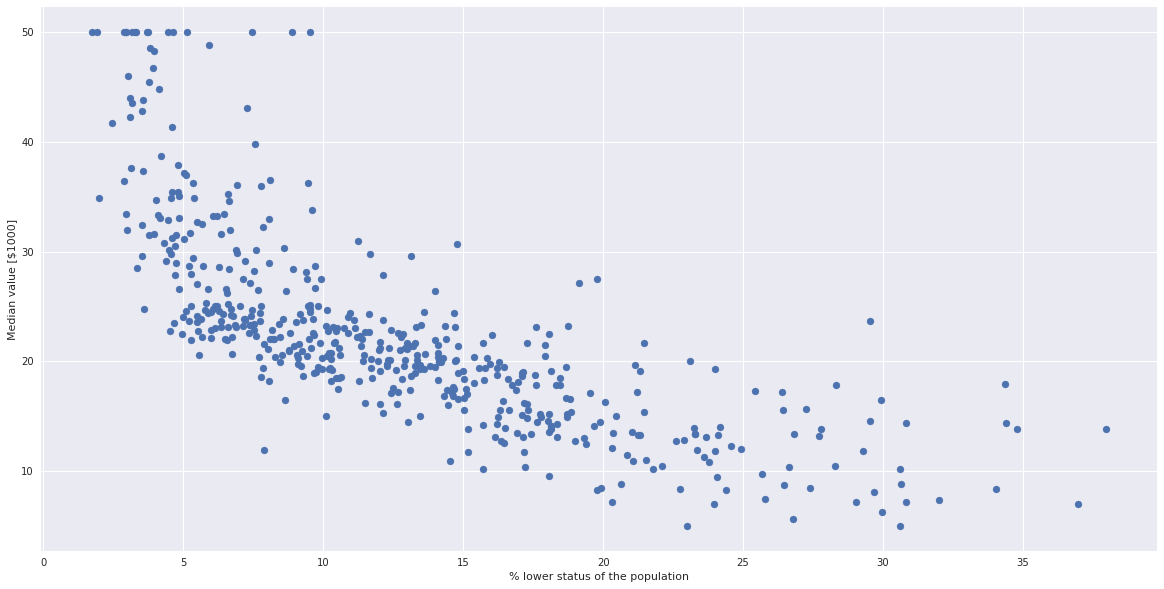

In [2]:
# Import modules
from sklearn.datasets import load_boston, load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ipywidgets import IntSlider, interact, fixed

sns.set()

%matplotlib inline

data, target = load_boston(True)

x = data[:,12]
y = target.reshape(target.size, 1)

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.ylabel("Median value [$1000]")
plt.xlabel("% lower status of the population")
plt.show()

x = np.vstack((np.ones(x.size),x)).T

In [17]:
# Funcion Hipotesis H
def hip(X, theta):
    # X     : matriz (m, n+1)
    # theta : vector (1, n+1)
    return np.dot(X,theta.T)

# Funcion de Costo J
def J(theta0, theta1, X, Y):
    # X     : matriz (m,n+1)
    # Y     : vector (m,1)
    # theta : vector (1,n+1)
    m  = Y.size
    
    return  (1/(2*m))* np.sum((hip(X, theta) - Y)**2)

def GradientDescent(X, Y, alpha, epsilon=0.01):
    # X     : matriz (m,n+1)
    # Y     : vector (m,1)
    
    #inicializamos valores para theta
    
    m, dim = X.shape
    
    theta = np.random.rand(dim).reshape(1, dim)
    
    hist = [theta]
    
    converge = False
    while not converge:

        # Calculamos los nuevos thetas
        temp = (hip(X, theta) - Y )
        ntheta = theta - alpha * (1/m) * np.dot(temp.T, X)

        # Converge si el cambio de los parametros es menor a epsilon
        converge = np.linalg.norm(ntheta - theta) < epsilon

        # Guardamos como van cambiando los thetas
        hist.append(ntheta)

        # actualizamos los parametros
        theta = ntheta
    
    return theta, hist

In [18]:
theta, hist = GradientDescent(x, y, 1e-4,  1e-4)
print("theta0: %f\ntheta1: %f" % (theta[0,0], theta[0,1]))

theta0: 30.400739
theta1: -0.700709


### Normal Equation

Una segunda forma de minimizar los valores es utilizando _Normal Equation_, esta vía, a diferencia de _Gradient descent_ no es iterativo. Consiste un simple despeje de $\vec{\theta}$.

$$\vec{\theta} = (X^T X)^{-1}X^T Y $$

#### Ventajas

    NO es iterativo.
    NO se necesita definir un learning rate.
    NO necesita escalado ni normalizar.

#### Desventajas

    Complejidad O(n^3) a diferencia de la complejidad de Gradient Descent O(kn^2).
    Lento para valores de n muy grandes.

In [19]:
def normal_equation(X,Y):
    # X     : matriz (m,n+1)
    # Y     : vector (m,1)
    
    # Calculamos (X^T * X)^-1
    temp = np.linalg.pinv(np.dot(X.T, X))
    
    # Calculamos (X^T * X)^-1) * X^T
    temp = np.dot(temp, X.T)
    
    # Calculamos ((X^T * X)^-1) * X^T) * Y
    return np.dot(temp, Y.reshape(Y.size, 1))

theta = normal_equation(x, y)
print("theta0: %f\ntheta1: %f" % (theta[0], theta[1]))

theta0: 34.553841
theta1: -0.950049


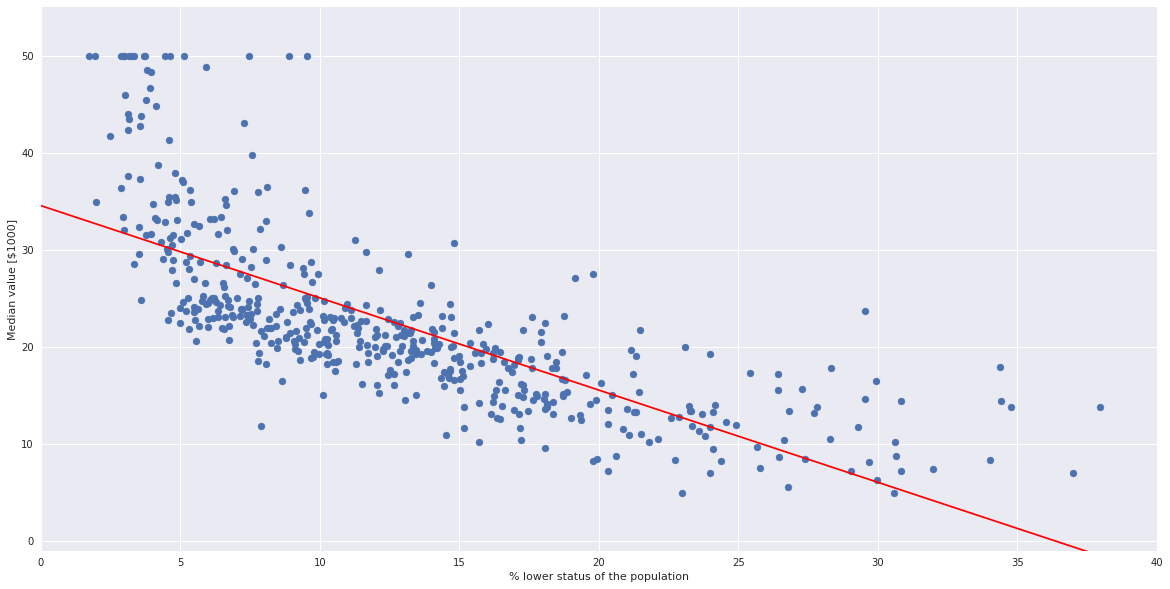

In [27]:
def plotter_norm(thetas, X, Y):
    x = np.arange(X[:,1].max()*1.25)
    x = np.vstack((np.ones(x.size),x)).T
    model = hip(x, thetas.T)
    plt.figure(figsize=(20,10))
    plt.plot(model, 'r')
    plt.scatter(X[:,1], y)
    plt.ylabel("Median value [$1000]")
    plt.ylim(-1,55)
    plt.xlim(0,40)
    plt.xlabel("% lower status of the population")
    plt.show()
plotter_norm(theta, x, y)

## Regresión Polinomial

Como se ha visto en los ejemplos anteriores, si bien nuestro modelo intenta ajustarse a los datos, queda limitada por ser un modelo lineal. Un mejor modelo seria un polinimio $p(x) = a + bx + cx^2 + dx^3 ...$.


### Modelo

El modelo polinomial es una aplicación del modelo multivariable. Creamos una nueva caracteristica a partir de un existente:

Ejemplo:
$$ x_2 = pow(x_1,2) $$

De este modo, podemos ajustar modelos no lineales a nuestros datos. Eligiendo nuevas caracteristicas a partir de las existentes.

### Consejos 

Dado a que estamos trabajado con potencias, el escalado de las caracteristicas se verá fuertemente afectado. Realizar normalización es ideal en este caso.

14

In [12]:
np.random.rand(2)

array([ 0.85432567,  0.66506682])